In [312]:
import numpy as np
import os
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Ex 1

In [313]:
fname = 'ex2data1.txt'
data = np.loadtxt(fname,dtype='float', delimiter=',')
#print (data)
print(len(data))
print(data.shape)
print(data.shape[0])
print(data.shape[1])
print(np.size(data))

100
(100, 3)
100
3
300


In [314]:
#print (data.shape)
X = np.array(data[:,0:2])
#y = np.array(data[:,2])
#y= np.reshape(y, (-1, 1))
y=np.expand_dims(data[:,2], axis=1)
print (X.shape)
print (y.shape)

(100, 2)
(100, 1)


In [315]:
#print (data)
pos = np.array([data[i] for i in range(X.shape[0]) if y[i] == 1])
neg=np.array([data[i] for i in range (X.shape[0]) if y[i] == 0])
print (pos.shape)
print (neg.shape)

(60, 3)
(40, 3)


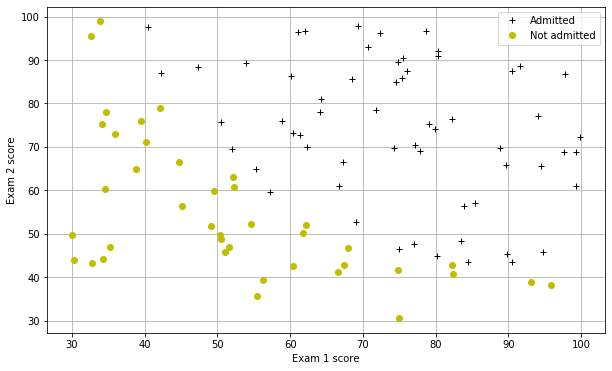

In [316]:
plt.figure(figsize=(10,6))
plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid(True)

In [317]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

Text(0.5, 1.0, 'Sigmoid function')

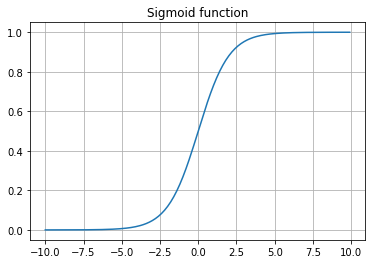

In [318]:
iteration = np.arange(-10,10,.1)
plt.plot(iteration,sigmoid(iteration))
plt.grid(True)
plt.title("Sigmoid function")

In [319]:
#min_array=np.amin(X,axis=0,keepdims=True)
#max_array=np.amax(X,axis=0,keepdims=True)
#mean_array=np.mean(X,axis=0,dtype=float,keepdims=True)
#X=(X-mean_array)/(max_array-min_array)
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
X = (X - mean)/std

In [320]:
tempo=np.ones(shape=(X.shape[0],1))
X=np.append(tempo,X,axis=1)
print (X.shape)

(100, 3)


In [321]:
def costFunction(theta,X,y):
    predictions = sigmoid(np.dot(X,theta))
    #error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    #tempo_cost = 1/m * sum(error)
    tempo_cost=(-1.0/m)*(np.dot(y.T , np.log(predictions)) + np.dot((1-y).T,np.log(1-predictions)))
    derivate = 1/m * np.dot(X.T,(predictions - y))
    return tempo_cost,derivate

In [322]:
# Learning process
num_iterations=50000
learning_rate=0.01
m=y.shape[0] #samples
theta=np.ones(shape=(X.shape[1],1))
print (theta.shape)

(3, 1)


Wall time: 1.66 s


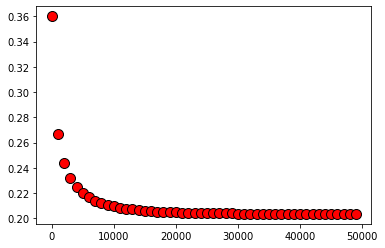

In [323]:
%%time
m=y.shape[0]
for i in range(0, num_iterations):
        cost, dtheta = costFunction(theta,X,y)
        theta = theta - (learning_rate*dtheta)
        if  i % 1000 == 0:
            #print (theta)
            plt.plot(i, cost, 'ro', ms=10, mec='k')
            #print ("Cost after iteration %i: %f" % (i, tempo_cost))

In [324]:
print (cost)

[[0.20352591]]


# Decision boundary
From Machine Learning Resources:

$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1"

$\Theta_0 + \Theta_1x_1 + \Theta_2x_2 = 0$ is the decision boundary

Since, we plot $x_1$ against $x_2$, the boundary line will be the equation $ x_2 = \frac{-(\Theta_0+\Theta_1x_1)}{\Theta_2}$

In [325]:
#boundary_xs = np.array(X[:,1:3])
#print (boundary_xs)
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])]) #X-axis
boundary_ys= (-1.0/theta[2])*(theta[0] + theta[1]*boundary_xs)
print(boundary_xs)
print (boundary_ys)

[-1.83802631  1.76561835]
[ 1.51042783 -2.35457896]


In [326]:
plot_value=np.array(X[:,1:])
print (plot_value.shape)

(100, 2)


In [327]:
pos = np.array([plot_value[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([plot_value[i] for i in range(X.shape[0]) if y[i] == 0])

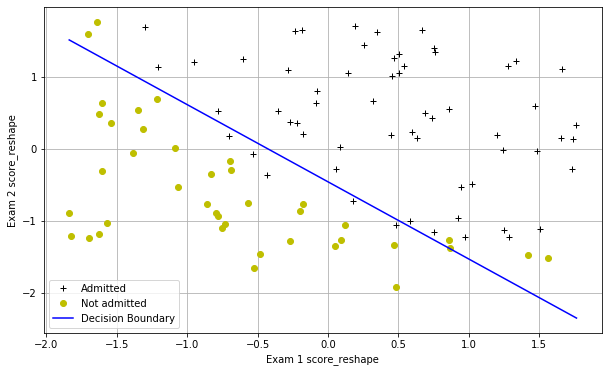

In [328]:
plt.figure(figsize=(10,6))
plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.xlabel('Exam 1 score_reshape')
plt.ylabel('Exam 2 score_reshape')
plt.legend()
plt.grid(True)

In [330]:
boundary_xs_plot = std*boundary_xs+mean
boundary_ys_plot = std*boundary_ys+mean

[-1.83802631  1.76561835]
[ 1.51042783 -2.35457896]


In [333]:
print (boundary_xs_plot)
print (boundary_ys_plot)
pos = np.array([data[i] for i in range(X.shape[0]) if y[i] == 1])
neg=np.array([data[i] for i in range (X.shape[0]) if y[i] == 0])

[30.05882245 98.86763812]
[94.88719402 22.68669099]


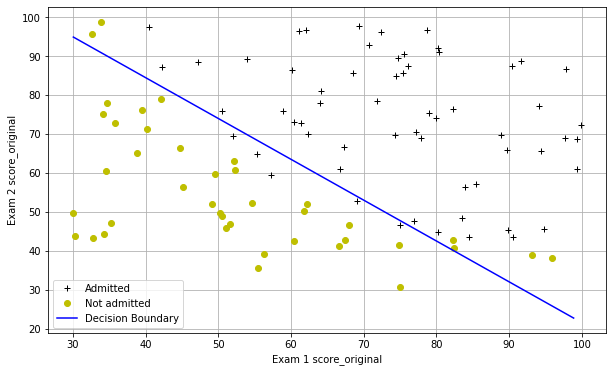

In [336]:
plt.figure(figsize=(10,6))
plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
plt.plot(boundary_xs_plot,boundary_ys_plot,'b-',label='Decision Boundary')
plt.xlabel('Exam 1 score_original')
plt.ylabel('Exam 2 score_original')
plt.legend()
plt.grid(True)

In [345]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


# Ex 2


In [383]:
fname = 'ex2data2.txt'
data = np.loadtxt(fname,dtype='float', delimiter=',')
X=np.array(data[:,:2])
y=np.array(data[:,2])
y=np.reshape(y,(-1,1))
print(X.shape)
print (y.shape)

(118, 2)
(118, 1)


In [384]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

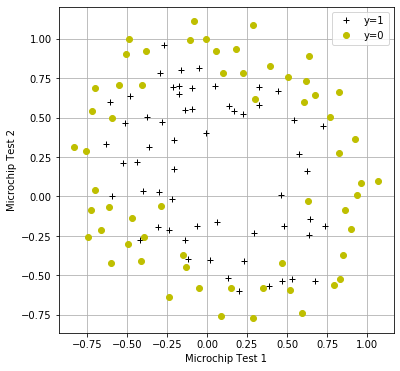

In [385]:
plt.figure(figsize=(6,6))
plt.plot(pos[:,0],pos[:,1],'k+',label='y=1')
plt.plot(neg[:,0],neg[:,1],'yo',label='y=0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.grid(True)

In [386]:
def costFunction(theta,X,y,la):
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions)) + la*np.dot(theta.T,theta)
    tempo_cost = 1/m * sum(error)
    #tempo_cost=(-1.0/m)*(np.dot(y.T , np.log(predictions)) + np.dot((1-y).T,np.log(1-predictions)))
    derivate = (1/m * np.dot(X.T,(predictions - y))) + la*theta/m
    return tempo_cost,derivate

In [387]:
tempo=np.ones(shape=(X.shape[0],1))
X=np.append(tempo,X,axis=1)
print (X.shape)

(118, 3)


In [390]:
# Learning process
num_iterations=50000
learning_rate=0.01
mylambda=0
m=y.shape[0] #samples
theta=np.ones(shape=(X.shape[1],1))
print (theta.shape)

(3, 1)


Wall time: 6.32 s


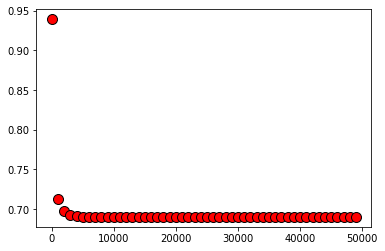

In [391]:
%%time
m=y.shape[0]
for i in range(0, num_iterations):
        cost, dtheta = costFunction(theta,X,y,mylambda)
        theta = theta - (learning_rate*dtheta)
        if  i % 1000 == 0:
            #print (theta)
            plt.plot(i, cost, 'ro', ms=10, mec='k')
            #print ("Cost after iteration %i: %f" % (i, cost))

# Ex 2 additional

In [397]:
datafile = 'ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [399]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

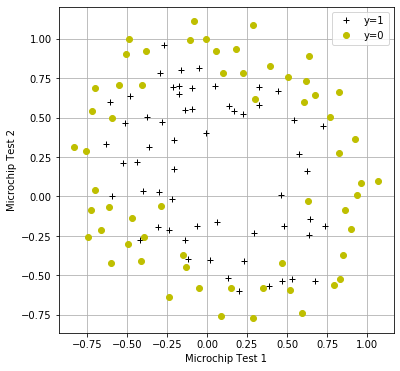

In [400]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

In [401]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [402]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

In [409]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return sigmoid(np.dot(myX,mytheta))

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [410]:
#so let's use minimize instead
from scipy import optimize
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

In [421]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()
    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

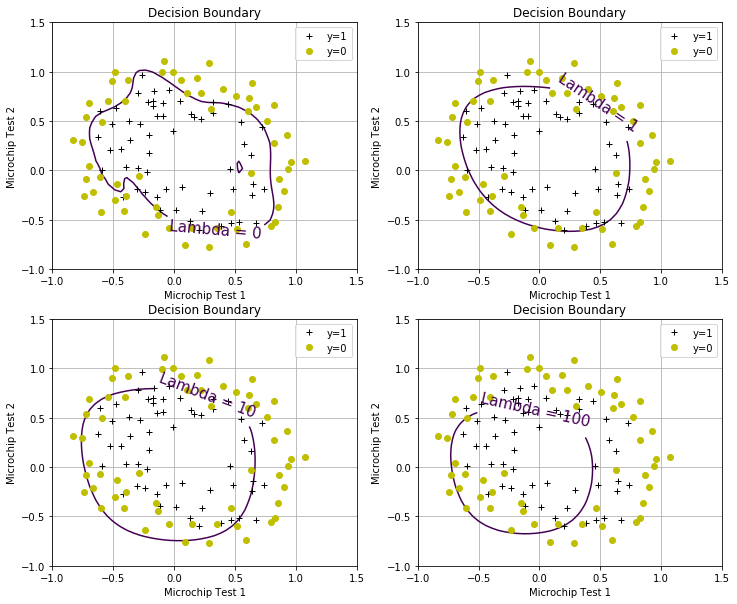

In [422]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)